In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
type

numpy.ndarray

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

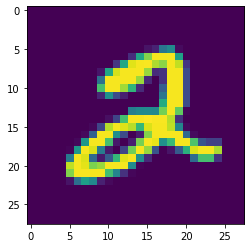

In [12]:
plt.imshow(x_train[5])

In [9]:
import matplotlib.pyplot as plt


In [13]:
print(y_train[5])

2


In [14]:
y_train.shape

(60000,)

In [15]:
y_train[0].shape

()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
df=pd.DataFrame(columns=['path','label'])

In [19]:
import pandas as pd

In [23]:
import os

In [125]:
for img in os.listdir('/content/drive/MyDrive/dataset'):
  df=df.append({'path':'/content/drive/MyDrive/dataset/'+str(img),'label':0 if 'cat' in img else 1},ignore_index=True)

In [126]:

df

,path,label
0,/content/drive/MyDrive/dataset/cat1.jpg,0
1,/content/drive/MyDrive/dataset/cat2.jpg,0
2,/content/drive/MyDrive/dataset/cat3.jpg,0
3,/content/drive/MyDrive/dataset/cat4.jpg,0
4,/content/drive/MyDrive/dataset/cat5.jpg,0
5,/content/drive/MyDrive/dataset/cattest.jpg,0
6,/content/drive/MyDrive/dataset/dog1.jpg,1
7,/content/drive/MyDrive/dataset/dog2.jpg,1
8,/content/drive/MyDrive/dataset/dog3.jpg,1
9,/content/drive/MyDrive/dataset/dog4.jpg,1


In [127]:
x_test=df.iloc[[5,11]]

In [128]:
x_test['label']

5     0
11    1
Name: label, dtype: object

In [129]:
df.drop([5,11],axis=0,inplace=True)

In [130]:
y_test=x_test['label']
x_test.drop(['label'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [131]:
x_train=df

In [132]:
y_train=x_train['label']
x_train.drop(['label'],axis=1,inplace=True)

In [133]:
x_train

,path
0,/content/drive/MyDrive/dataset/cat1.jpg
1,/content/drive/MyDrive/dataset/cat2.jpg
2,/content/drive/MyDrive/dataset/cat3.jpg
3,/content/drive/MyDrive/dataset/cat4.jpg
4,/content/drive/MyDrive/dataset/cat5.jpg
6,/content/drive/MyDrive/dataset/dog1.jpg
7,/content/drive/MyDrive/dataset/dog2.jpg
8,/content/drive/MyDrive/dataset/dog3.jpg
9,/content/drive/MyDrive/dataset/dog4.jpg
10,/content/drive/MyDrive/dataset/dog5.jpg


In [134]:
x_test

,path
5,/content/drive/MyDrive/dataset/cattest.jpg
11,/content/drive/MyDrive/dataset/dogtest.jpg


In [135]:
y_train

0     0
1     0
2     0
3     0
4     0
6     1
7     1
8     1
9     1
10    1
Name: label, dtype: object

In [136]:
y_test


5     0
11    1
Name: label, dtype: object

In [137]:
xtrain=[]

In [138]:
xtest=[]

In [139]:
for i in x_train['path']:
  img_arr=cv2.imread(i)

  img_arr=cv2.resize(img_arr,(224,224))

  xtrain.append(img_arr)

In [140]:
import cv2

In [141]:
xtrain[0].shape

(224, 224, 3)

In [142]:
len(xtrain)

10

In [143]:
for i in x_test['path']:
  img_arr=cv2.imread(i)

  img_arr=cv2.resize(img_arr,(224,224))

  xtest.append(img_arr)

In [144]:
xtrain=np.array(xtrain)
xtest=np.array(xtest)


In [164]:
model = tf.keras.Sequential([
    layers.Conv2D(64, (3,3), strides=(2,2),padding='same',input_shape= (224,224,3),activation = 'relu'), 
    layers.MaxPool2D(2,2), 
    layers.Conv2D(128, (3,3), strides=(2,2),padding='same',activation = 'relu'),
    layers.MaxPool2D(2,2), 
    layers.Conv2D(256, (3,3), strides=(2,2),padding='same',activation = 'relu'), 
    layers.MaxPool2D(2,2),  
    layers.Flatten(), 
    layers.Dense(158, activation ='relu'), 
    layers.Dense(256, activation = 'relu'), 
    layers.Dense(128, activation = 'relu'), 
    layers.Dense(2, activation = 'softmax'), 

]) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 256)       

In [146]:

import tensorflow as tf  

In [147]:
import tensorflow as tf  
from tensorflow.keras import layers
from tensorflow.keras import Model  
from tensorflow.keras.optimizers import RMSprop, Adam

In [165]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [149]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

xtrain /= 255
xtest /= 255

In [150]:
from keras.utils import np_utils


In [151]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [166]:
model.fit(xtrain, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6943 - acc: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 313ms/step - loss: 0.6905 - acc: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 251ms/step - loss: 1.0275 - acc: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 334ms/step - loss: 0.6930 - acc: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 277ms/step - loss: 0.6886 - acc: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 324ms/step - loss: 0.6812 - acc: 0.7000
Epoch 7/10
1/1 [==============================] - 0s 296ms/step - loss: 0.6658 - acc: 0.7000
Epoch 8/10
1/1 [==============================] - 0s 305ms/step - loss: 0.6725 - acc: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 305ms/step - loss: 0.7239 - acc: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 282ms/step - loss: 0.6698 - acc: 1.0000


In [167]:
model.predict(xtest)

1/1 [==============================] - 1s 727ms/step


array([[0.5753121 , 0.4246879 ],
       [0.6006162 , 0.39938378]], dtype=float32)